20180111

# Chapter2 感測器

## 建立AND Gate

In [1]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7

In [2]:
w*x

array([ 0. ,  0.5])

In [3]:
np.sum(w*x) + b

-0.19999999999999996

In [4]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    temp = np.sum(x*w)+b
    if temp <= 0:
        return 0
    else:
        return 1

In [5]:
AND(0,1)

0

## NAND Gate

In [6]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    temp = np.sum(x*w)+b
    if temp <= 0:
        return 0
    else:
        return 1

In [8]:
NAND(0,1)

1

## OR Gate

In [9]:
def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2 # 與 AND Gate 最大的不同點
    temp = np.sum(x*w)+b
    if temp <= 0:
        return 0
    else:
        return 1

In [13]:
OR(0,0)

0

## XOR Gate
這是單一層AND Gate, OR Gate 或者是 XOR Gate都無法做到的。但是透過多層次邏輯閘(multi-layered perceptron)就能做到這個元件

In [14]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [18]:
XOR(1,1)

0

# Chapter3 神經網路

## 建立階梯函數

這是為了numpy array可以快速處理的版本

In [19]:
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [20]:
x = np.array([-1,1.0,2])

In [22]:
y = x>0
y

array([False,  True,  True], dtype=bool)

透過型態轉換，可以幫助boolean變數轉換成數值變數

In [23]:
y.astype(np.int)

array([0, 1, 1])

產生step function圖表

In [25]:
import matplotlib.pylab as plt
%matplotlib inline

In [26]:
def step_function(x):
    return np.array(x>0,dtype=np.int)

In [28]:
x = np.arange(-5,5,0.1)
y = step_function(x)

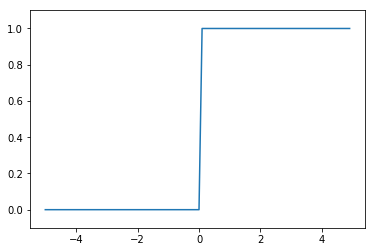

In [29]:
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### sigmoid function

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [31]:
x = np.array([-1,1,2])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

畫圖看看sigmoid function

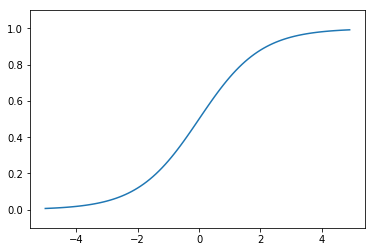

In [32]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### ReLU function

In [33]:
def relu(x):
    return np.maximum(0,x)

## 多維陣列的運算

In [34]:
A = np.array([1,2,3,4])
A

array([1, 2, 3, 4])

In [35]:
A.ndim

1

In [36]:
A.shape

(4,)

In [37]:
B = np.array([[1,2],[3,4],[5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [38]:
B.ndim

2

In [39]:
B.shape

(3, 2)

神經網路使用的基礎運算
$ Y = WX + B $

In [40]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])

In [43]:
Y = np.dot(X,W)
Y

array([ 5, 11, 17])

### 執行一層的神經網路

In [45]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B = np.array([0.1,0.2,0.3])
A = np.dot(X,W1) + B
A

array([ 0.3,  0.7,  1.1])

In [47]:
Z1 = sigmoid(A)
Z1

array([ 0.57444252,  0.66818777,  0.75026011])

In [48]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2
A2

array([ 0.51615984,  1.21402696])

In [49]:
Z2 = sigmoid(A2)
Z2

array([ 0.62624937,  0.7710107 ])

In [50]:
def identity_function(x):
    return x

In [51]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3) + B3
A3

array([ 0.31682708,  0.69627909])

In [52]:
Y = identity_function(A3)
Y

array([ 0.31682708,  0.69627909])

### 整合版本

In [56]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network
def forward(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3'] 
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3) # 輸出層
    return y

In [57]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
y

array([ 0.31682708,  0.69627909])

### 輸出層的設計

#### softmax function
$ y_k = \frac{exp(a_k)}{\Sigma_{i=1}{n}exp(a_i)} $

In [61]:
def softmax(x):
    c = np.max(x)
    exp_a = np.exp(x-c) #防止溢位
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

使用範例

In [63]:
softmax(np.array([0.3,2.9,4.0]))

array([ 0.01821127,  0.24519181,  0.73659691])

### 處理MNIST資料
[參考資料](https://gist.github.com/ronekko/6b2aae585199abf2a2ba)

In [73]:
from sklearn import datasets
from PIL import Image

In [67]:
mnist = datasets.fetch_mldata('MNIST original')

In [68]:
n_train = 60000 

In [69]:
data_train = mnist.data[:n_train]
target_train = mnist.target[:n_train]
data_test = mnist.data[n_train:]
target_test = mnist.target[n_train:]

In [71]:
x_train, t_train, x_test, t_test  = (data_train.astype(np.float32), target_train.astype(np.float32),data_test.astype(np.float32), target_test.astype(np.float32))

In [75]:
t_train.shape

(60000,)

In [72]:
x_train.shape

(60000, 784)

In [83]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [76]:
index = 0
img = x_train[index]
label = t_train[index]
label

0.0

In [77]:
print(img.shape)

(784,)


In [79]:
img = img.reshape(28,28)
print(img.shape)

(28, 28)


In [84]:
img_show(img)

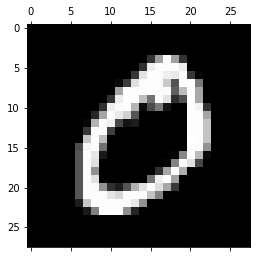

In [85]:
plt.matshow(img, cmap=plt.cm.gray)
plt.show()

### 透過已經訓練好的模型進行預測

In [108]:
def get_data():
    mnist = datasets.fetch_mldata('MNIST original')
    n_train = 6000
    data_train = mnist.data[:n_train]
    target_train = mnist.target[:n_train]
    data_test = mnist.data[n_train:]
    target_test = mnist.target[n_train:]
    x_train, t_train, x_test, t_test  = (data_train.astype(np.float32), target_train.astype(np.float32),data_test.astype(np.float32), target_test.astype(np.float32))
    return x_test/256,t_test

In [93]:
import pickle
def init_network():
    with open('sample_weight.pkl','rb') as f:
        network = pickle.load(f)
    return network

In [88]:
def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3'] 
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3) # 輸出層
    return y

In [110]:
x,t=get_data()

In [94]:
network = init_network()

In [111]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

In [112]:
print("Accuracy:%f"%(float(accuracy_cnt)/len(x)))

Accuracy:0.932219


In [115]:
accuracy_cnt

59662

In [136]:
index = 41654
t[index]

7.0

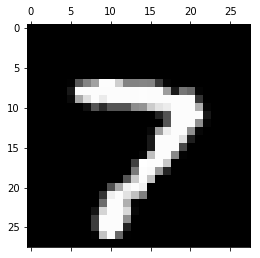

In [137]:
plt.matshow(np.uint8(x[index]*256).reshape(28,28), cmap=plt.cm.gray)
plt.show()

In [138]:
# 預測輸出結果
y = predict(network,x[index])
np.argmax(y)

7